# Airline Reviews Analysis

 - Verma Arushi (U2323573K) & Mittal Palak (U2323874C)
 ---

# Background
---

In recent decades, airline competition has received tremendous interest inside the research community, given the competition’s potentially extensive impacts on passengers, economies, and the society as a whole. Our analysis focuses on the reviews of the Top 10 rated airlines in 2023 sourced from Airline Quality (https://www.airlinequality.com) website.

Categories covered by our analysis include Passenger Reviews, Staff Service Quality, Seat Comfort, Inflight Entertainment, Food & Beverages and Value for Money.

Our Problem Statement is **Developing a tailored evaluation framework to identify the best airline based on reviews and factors including convenience, comfort, and service quality.**

Airlines can use this framework to understand customer satisfaction and beat their competition.

---

## Essential Libraries

In [57]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
import shap

In [2]:
# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Deepak
[nltk_data]     Mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

---

## Data Preparation & Cleaning

In [42]:
df = pd.read_csv('airlines_reviews.csv')
df.head() 

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In Data Cleaning, we are doing the following things
- Some users have given the same review multiple times. We are removing these duplicate reviews.
- We also filtered out reviews which are verified as 'False'.
- We removed columns which are not relevant in our analysis. These columns are 'Review Date','Route','Title'.

In [3]:
# Filter out rows with "FALSE" values in the 'Verified' column
cleaned_df = df[df['Verified'] == 'True']

# Identify the column containing the names
name_column = 'Name'  # Replace 'Name' with the actual column name containing names

# Remove duplicate names
cleaned_df = cleaned_df.drop_duplicates(subset=[name_column])

# Specify the columns to remove
columns_to_remove = ['Review Date', 'Route', 'Title']

# Remove specified columns
cleaned_df = cleaned_df.drop(columns=columns_to_remove)

# Display the cleaned dataset
print(cleaned_df)

                  Name             Airline Verified  \
0     Alison Soetantyo  Singapore Airlines     True   
1        Robert Watson  Singapore Airlines     True   
2                S Han  Singapore Airlines     True   
3             D Laynes  Singapore Airlines     True   
4            A Othman   Singapore Airlines     True   
...                ...                 ...      ...   
8083       S Vistaphon          Korean Air     True   
8085          G Nazano          Korean Air     True   
8093             F Lee          Korean Air     True   
8095         N Vickers          Korean Air     True   
8097           C Clark          Korean Air     True   

                                                Reviews Type of Traveller  \
0       Flight was amazing. The crew onboard this fl...      Solo Leisure   
1       Booking an emergency exit seat still meant h...      Solo Leisure   
2       Excellent performance on all fronts. I would...    Family Leisure   
3      Pretty comfortable fligh

- No. of rows changed from 7614 to 5090.
- No. of columns changed from 17 to 14.
- All "false" reviews removed.

## Exploratory Data Analysis

In order to get an understanding of what our data is like, we conducted Exploratory Data Analysis.
First we plot the frequency of Overall Ratings for each airlines using a Histogram.

#### Histogram of Overall Ratings for each airlines

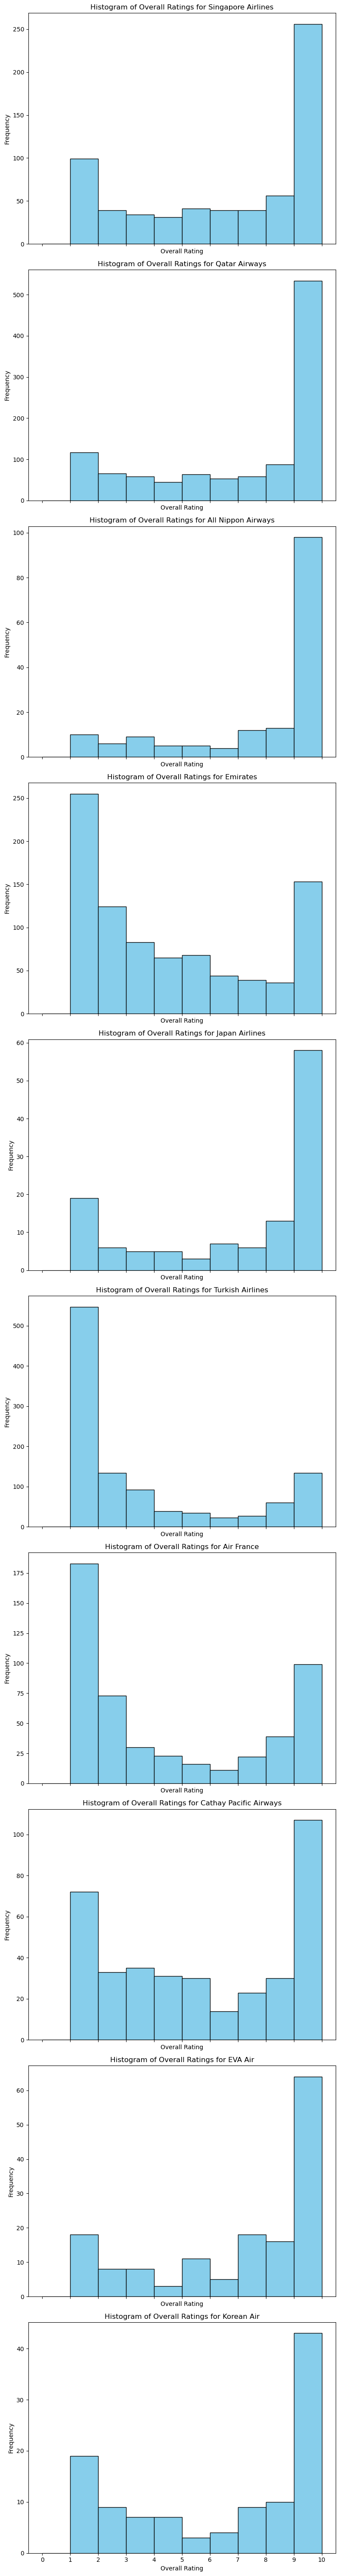

In [4]:
# Get unique airlines
unique_airlines = cleaned_df['Airline'].unique()

# Create subplots for each airline
fig, axs = plt.subplots(len(unique_airlines), figsize=(8, 6 * len(unique_airlines)), sharex=True)

# Iterate over each unique airline
for i, airline in enumerate(unique_airlines):
    # Filter data for the current airline
    airline_data = cleaned_df[cleaned_df['Airline'] == airline]['Overall Rating']
    
    # Plot histogram for the current airline
    axs[i].hist(airline_data, bins=range(0, 11), color='skyblue', edgecolor='black')
    
    # Set title for the subplot
    axs[i].set_title(f'Histogram of Overall Ratings for {airline}')
    
    # Set labels
    axs[i].set_xlabel('Overall Rating')
    axs[i].set_ylabel('Frequency')
    
    # Set x-ticks to integer values
    axs[i].set_xticks(range(0, 11))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Then we plot a Violin plot and a Box Plot to understand the distribution of Overall Ratings for each Airline.

#### Distribution of Overall Ratings for each airlines

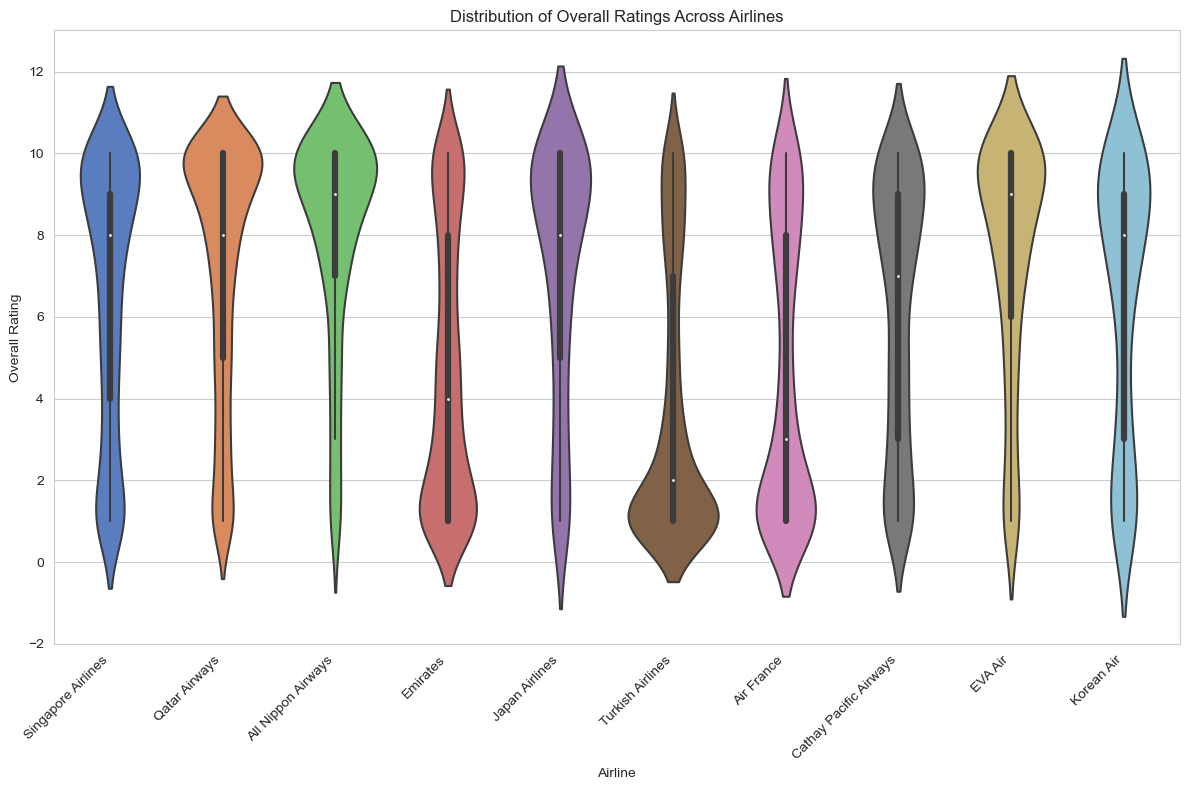

In [5]:
# Set the style of the seaborn plot
sb.set_style("whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 8))
sb.violinplot(x='Airline', y='Overall Rating', data=df, palette='muted')
plt.title('Distribution of Overall Ratings Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Majority of the Airlines have a broader distribution between of the ratings of 8 to 10 except Emirates, Turkish Airlines and Air France which have a broader distribution between 0 to 2. 

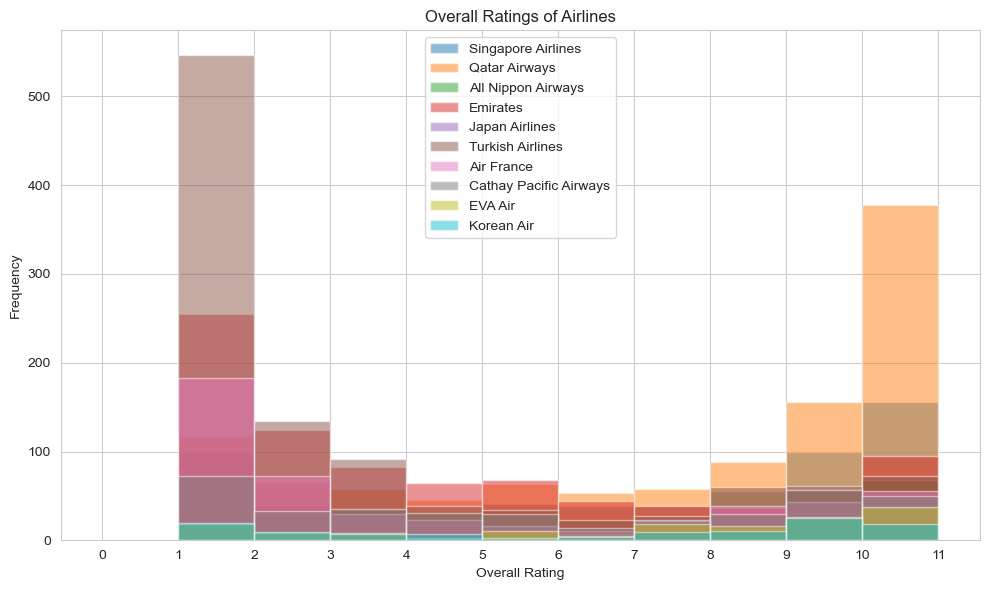

In [6]:
# Plot overall ratings of all airlines in one histogram
plt.figure(figsize=(10, 6))
for airline in cleaned_df['Airline'].unique():
    plt.hist(cleaned_df[cleaned_df['Airline'] == airline]['Overall Rating'], bins=range(0, 12), alpha=0.5, label=airline)

plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Overall Ratings of Airlines')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 12))
plt.tight_layout()

# Show plot
plt.show()

#### Box plot to show Overall Rating distribution for each airlines

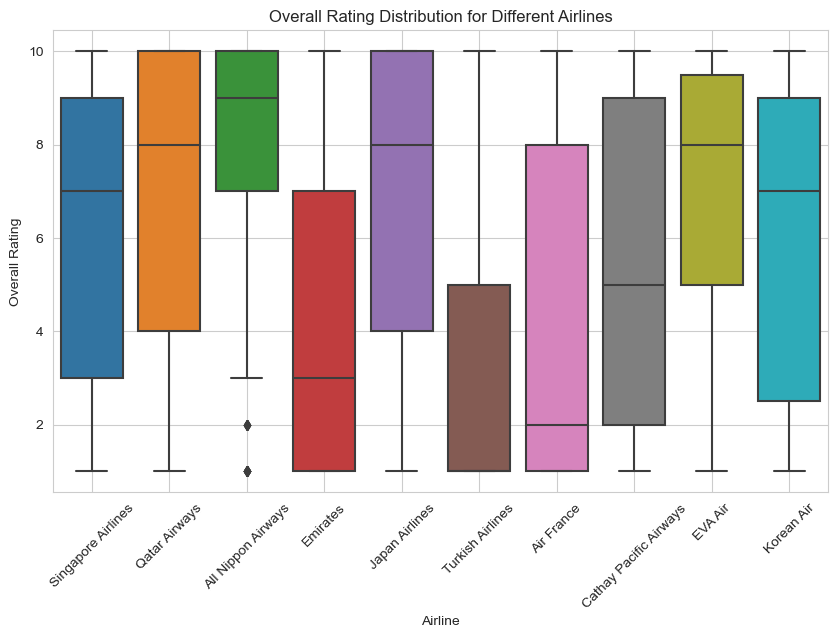

In [7]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='Airline', y='Overall Rating', data=cleaned_df)
plt.title('Overall Rating Distribution for Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

HIGHEST MEDIAN: All Nippon Airways

LOWEST MEDIAN: Turkish Airlines

#### Count plot to show whether or not the airlines is recommended.

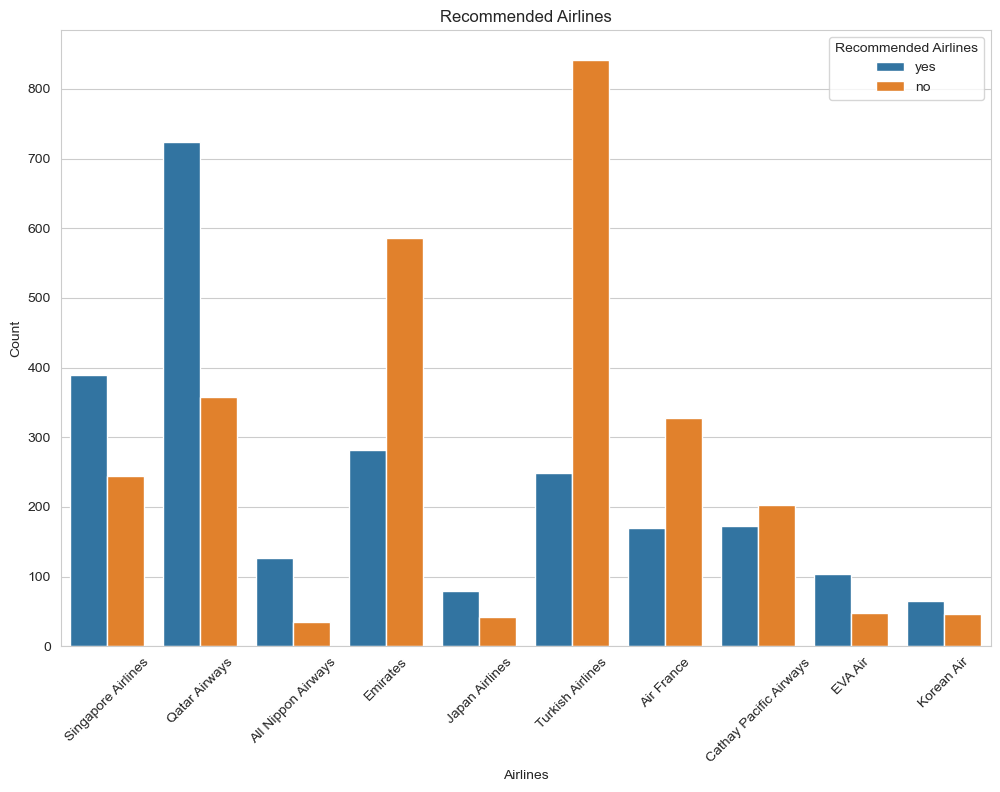

In [8]:
plt.figure(figsize=(12, 8))
sb.countplot(x='Airline', hue='Recommended', data=cleaned_df)
plt.title('Recommended Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.legend(title='Recommended Airlines')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

The *most recommended* airlines by the customers is **Qatar Airways** and the *least recommended* airlines is **Turkish Airlines**.

#### Time series to show evolution of Overall Ratings for each airline with time

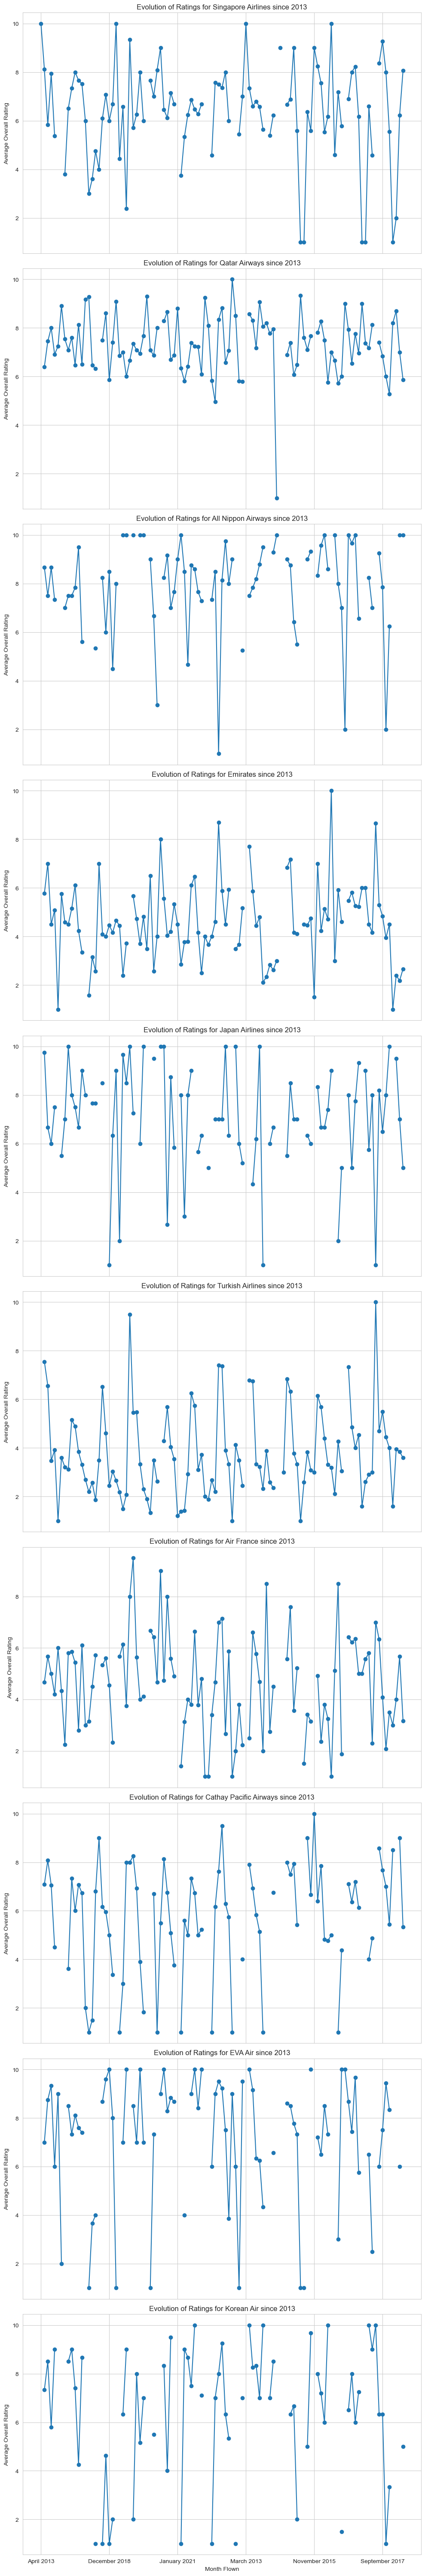

In [9]:
# Select the columns to include in the plot
review_cols = ['Overall Rating']

# Group the DataFrame by both 'Month Flown' and 'Airline' and calculate the mean of the selected columns
grouped_df = df.groupby(['Month Flown', 'Airline'])[review_cols].mean().unstack()

# Get the list of unique airlines
airlines = df['Airline'].unique()

# Create subplots for each airline
fig, axs = plt.subplots(len(airlines), 1, figsize=(10, 6*len(airlines)), sharex=True)

# Plot ratings for each airline on separate subplots
for i, airline in enumerate(airlines):
    ax = axs[i]
    grouped_df['Overall Rating'][airline].plot(ax=ax, marker='o')
    ax.set_title(f'Evolution of Ratings for {airline} since 2013')
    ax.set_ylabel('Average Overall Rating')
    ax.grid(True)

# Set common x-axis label
axs[-1].set_xlabel('Month Flown')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Heat Map to show correlation between the variables and the overall rating to find which variables affect the overall rating the most

<Axes: >

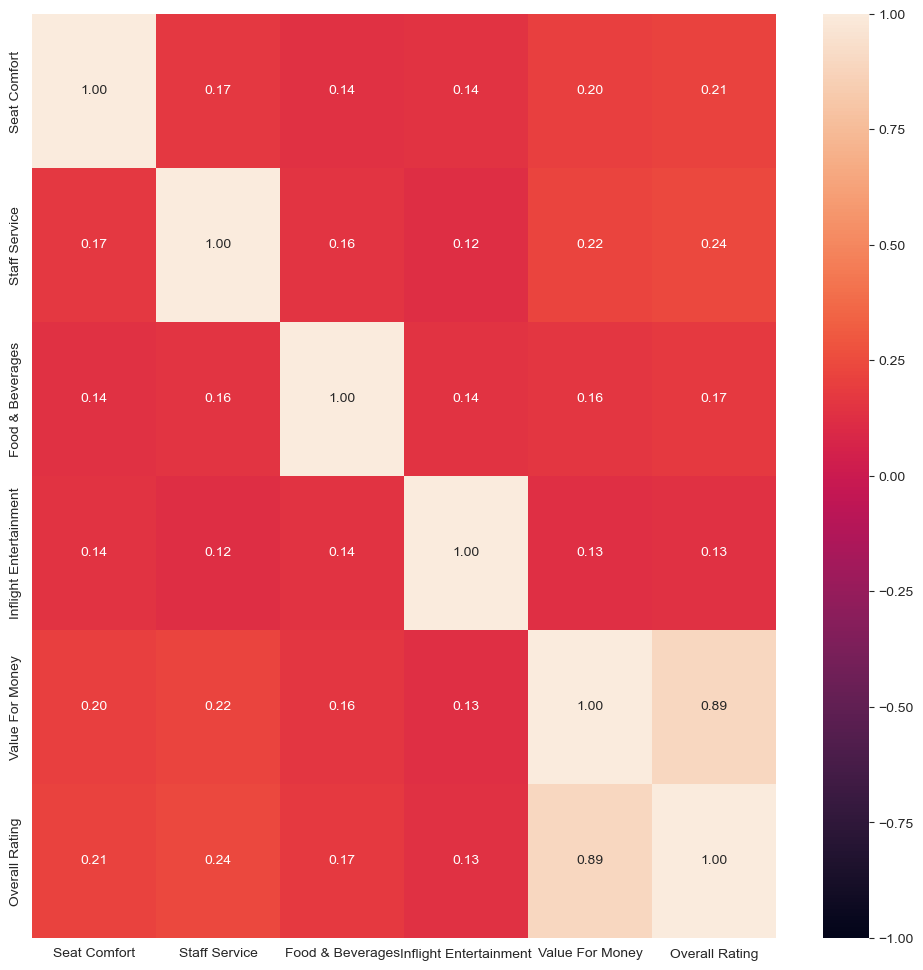

In [10]:
seat= pd.DataFrame(cleaned_df['Seat Comfort'])
staff = pd.DataFrame(cleaned_df['Staff Service'])
food = pd.DataFrame(cleaned_df['Food & Beverages'])
entertain = pd.DataFrame(cleaned_df['Inflight Entertainment'])
val = pd.DataFrame(cleaned_df['Value For Money'])
overall = pd.DataFrame(cleaned_df['Overall Rating'])

# Extract only the numeric data variables
numDF = pd.DataFrame(cleaned_df[["Seat Comfort", "Staff Service", "Food & Beverages", "Inflight Entertainment", "Value For Money", "Overall Rating"]])

# Summary Statistics for all Variables
numDF.describe()

# Calculate the complete  correlation matrix
numDF.corr()

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Based on the correlations from the Heat Map given above, it is seen that the Top Variable affecting the overall rating is Value For Money having a correlation of 0.89.

---

## Machine Learning

### Model 1: SENTIMENT INTENSITY ANALYSER

Initializes and utilizes the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer to analyze the sentiment of each review in our DataSet. 

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically tuned to analyze sentiment in text data. It's widely used because of its simplicity, effectiveness, and ability to handle sentiment analysis tasks in real-time.

### How VADER Functions:

1. *Lexicon-Based Approach*: VADER uses a pre-built lexicon (a dictionary) of words that are labeled with sentiment scores. These scores are typically between -1 and 1, where negative values indicate negative sentiment, positive values indicate positive sentiment, and values around 0 indicate neutrality. Each word in the lexicon is associated with a polarity score based on its sentiment intensity.

2. *Sentiment Intensity*: VADER considers not just the presence of words but also their intensity. For example, the word "good" might contribute positively to sentiment, while "excellent" might contribute even more positively. This allows VADER to capture the strength of sentiment expressed by each word in a text.

3. *Sentence-Level Analysis*: VADER analyzes the sentiment of text at the sentence level, rather than just looking at individual words in isolation. It takes into account the grammatical and syntactical structure of sentences to better understand the sentiment being expressed.

4. *Punctuation and Capitalization*: VADER is sensitive to the effect of punctuation and capitalization in text. For example, "GOOD!" might be interpreted as more positive than "good." This allows VADER to capture nuances in sentiment expression.

5. *Handling of Emojis, Slangs, and Acronyms*: VADER is designed to handle various forms of language commonly used in social media, including emojis, slang, and acronyms. It recognizes their sentiment implications and incorporates them into its analysis.

6. *Negation Handling*: VADER considers negations in text. For example, "not good" would be interpreted as negative sentiment, even though "good" by itself is positive.

7. *Aggregate Score Calculation*: VADER calculates an aggregate sentiment score for each text based on the individual sentiment scores of the words it contains. The compound score, ranging from -1 to 1, is often used as a summary measure of sentiment polarity.

### Limitations of VADER:

- *Contextual Understanding*: While VADER is effective for many use cases, it may struggle with understanding the context in which words are used. This can lead to inaccuracies, especially in complex or nuanced texts.

- *Inability to Handle Irony and Sarcasm*: Like many sentiment analysis tools, VADER may struggle to accurately interpret irony, sarcasm, or other forms of nuanced language.

### Evaluating sentiment scores using sentiment analyser

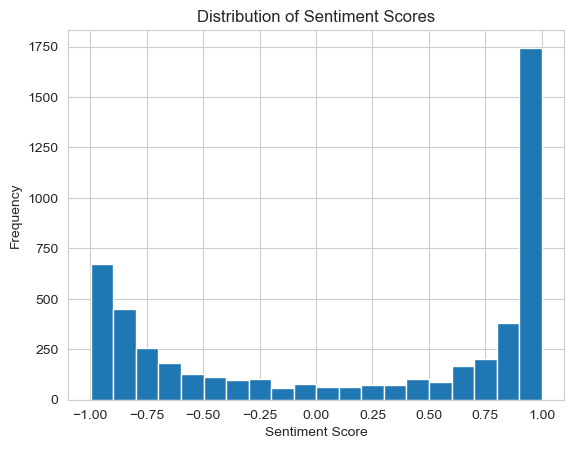

In [11]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each review
sentiments = []
for review in cleaned_df['Reviews']:
    sentiment_score = sid.polarity_scores(review)
    sentiments.append(sentiment_score['compound'])  # Use compound score as the overall sentiment score

# Add the sentiment scores to the DataFrame
cleaned_df['Sentiment'] = sentiments

# Visualize the distribution of sentiment scores
cleaned_df['Sentiment'].hist(bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

1 -> Most positive review

0-> Neutral review 

-1 -> Most negative review

#### It is seen that the airlines are mostly given a positive review.

#### Distribution of Type of Reviews for Each Airline

In [12]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each airline
sentiment_results = {}
for airline, reviews in cleaned_df.groupby('Airline')['Reviews']:
    sentiment_scores = {'positive': 0, 'neutral': 0, 'negative': 0}
    for review in reviews:
        sentiment_score = sid.polarity_scores(review)
        if sentiment_score['compound'] >= 0.05:
            sentiment_scores['positive'] += 1
        elif sentiment_score['compound'] <= -0.05:
            sentiment_scores['negative'] += 1
        else:
            sentiment_scores['neutral'] += 1
    sentiment_results[airline] = sentiment_scores

# Display sentiment analysis results
for airline, scores in sentiment_results.items():
    print(f"Airline: {airline}")
    print(f"Positive Reviews: {scores['positive']}")
    print(f"Neutral Reviews: {scores['neutral']}")
    print(f"Negative Reviews: {scores['negative']}")
    print()


Airline: Air France
Positive Reviews: 239
Neutral Reviews: 7
Negative Reviews: 250

Airline: All Nippon Airways
Positive Reviews: 132
Neutral Reviews: 2
Negative Reviews: 28

Airline: Cathay Pacific Airways
Positive Reviews: 223
Neutral Reviews: 3
Negative Reviews: 149

Airline: EVA Air
Positive Reviews: 110
Neutral Reviews: 1
Negative Reviews: 40

Airline: Emirates
Positive Reviews: 426
Neutral Reviews: 18
Negative Reviews: 423

Airline: Japan Airlines
Positive Reviews: 92
Neutral Reviews: 0
Negative Reviews: 30

Airline: Korean Air
Positive Reviews: 81
Neutral Reviews: 2
Negative Reviews: 28

Airline: Qatar Airways
Positive Reviews: 810
Neutral Reviews: 11
Negative Reviews: 261

Airline: Singapore Airlines
Positive Reviews: 433
Neutral Reviews: 8
Negative Reviews: 193

Airline: Turkish Airlines
Positive Reviews: 381
Neutral Reviews: 19
Negative Reviews: 690



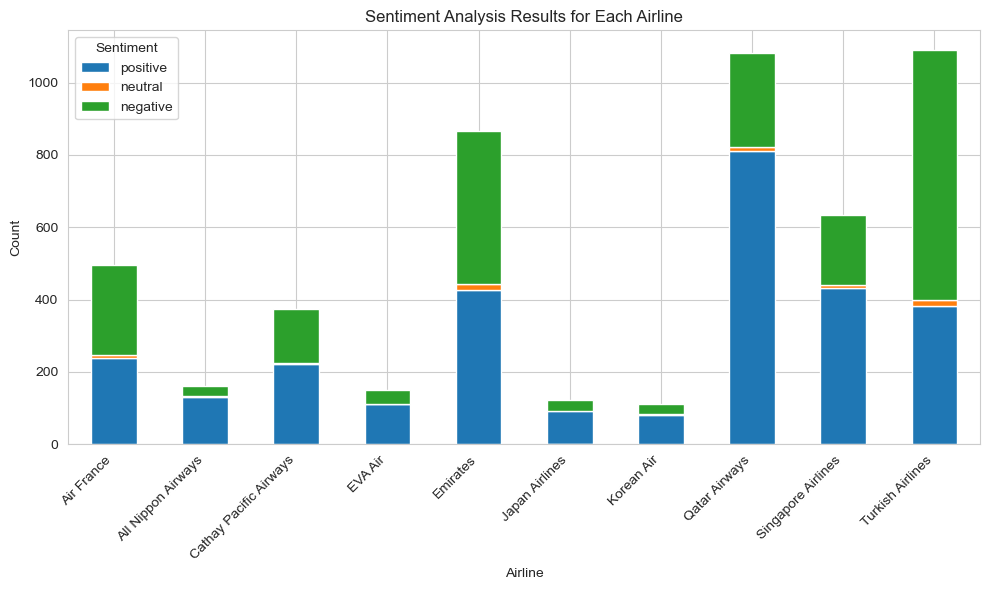

In [15]:
# Sample sentiment analysis results for each airline (replace with your actual sentiment analysis results)
sentiment_results = {
    'Air France': {'positive': 239, 'neutral': 7, 'negative': 250},
    'All Nippon Airways': {'positive': 132, 'neutral': 2, 'negative': 28},
    'Cathay Pacific Airways': {'positive': 223, 'neutral': 3, 'negative': 149},
    'EVA Air':{'positive':110, 'neutral':1, 'negative':40},
    'Emirates':{'positive':426, 'neutral':18, 'negative':423},
    'Japan Airlines':{'positive':92, 'neutral':0, 'negative':30},
    'Korean Air':{'positive':81, 'neutral':2, 'negative':28},
    'Qatar Airways':{'positive':810, 'neutral':11, 'negative':261},
    'Singapore Airlines':{'positive':433, 'neutral':8, 'negative':193},
    'Turkish Airlines':{'positive':381, 'neutral':19, 'negative':690},
}

# Convert sentiment analysis results to a DataFrame
df_sentiment = pd.DataFrame(sentiment_results).T

# Plot histogram
df_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results for Each Airline')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()

# Show plot
plt.show()

The *most positive reviews* are given for **Qatar Airways** and the *most negative reviews* are given for **Turkish Airlines**.

In [16]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review and add a new column with sentiment scores
cleaned_df['Sentiment'] = cleaned_df['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Display the updated dataset
print(cleaned_df.head())

# Save the updated dataset with sentiment scores
cleaned_df.to_csv("airlines_reviews.csv", index=False)  # Replace "airlines_dataset_with_sentiment.csv" with your desired output file name

               Name             Airline Verified  \
0  Alison Soetantyo  Singapore Airlines     True   
1     Robert Watson  Singapore Airlines     True   
2             S Han  Singapore Airlines     True   
3          D Laynes  Singapore Airlines     True   
4         A Othman   Singapore Airlines     True   

                                             Reviews Type of Traveller  \
0    Flight was amazing. The crew onboard this fl...      Solo Leisure   
1    Booking an emergency exit seat still meant h...      Solo Leisure   
2    Excellent performance on all fronts. I would...    Family Leisure   
3   Pretty comfortable flight considering I was f...      Solo Leisure   
4   The service was consistently good from start ...    Family Leisure   

     Month Flown           Class  Seat Comfort  Staff Service  \
0  December 2023  Business Class             4              4   
1  February 2024   Economy Class             5              3   
2  February 2024   Economy Class             1 

We added a new column for the sentiment scores of each review.

---

##  Model 2: Linear Regression
---

A linear regression model is trained to predict the overall rating of airlines based on various predictor variables.
   
### How Linear Regression Works:
Linear regression is a statistical method used to model the relationship between a dependent variable (response) and one or more independent variables (predictors). In this case:

- *Model Representation*: The linear regression model represents the relationship between the response variable (overall rating) and the predictor variables (features) as a linear equation:
  
  **Overall Rating = b + a1 * Value For Money + a2 * Sentiment + ... + an * Seat Comfort**
  
  Where b is the intercept (constant term) and a1, a2, ..., an are the coefficients associated with each predictor variable.

- *Model Training*: The model is trained using the training data (X_train, y_train) to estimate the coefficients (a values) that minimize the difference between the actual and predicted overall ratings.

- *Prediction*: Once trained, the model can predict the overall rating for new data points (test set) by applying the learned coefficients to the predictor variables.

- *Interpretation of Coefficients*: The coefficients represent the change in the response variable for a one-unit change in the corresponding predictor variable, holding all other predictors constant. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship.

In [18]:
#Extracting response and predictors
y = pd.DataFrame(cleaned_df['Overall Rating'])  # Response
X = pd.DataFrame(cleaned_df[["Value For Money","Sentiment","Inflight Entertainment","Food & Beverages","Staff Service","Seat Comfort"]]) #Predictor

- y: A DataFrame containing the response variable, which is the 'Overall Rating' of airlines.
- X: A DataFrame containing predictor variables such as 'Value For Money', 'Sentiment', 'Inflight Entertainment', 'Food & Beverages', 'Staff Service', and 'Seat Comfort'.
- We also initialized an empty DataFrame test_set to store a portion of the data for testing purposes.

In [19]:
i# Initialize an empty dataframe to store the test set
test_set = pd.DataFrame()

# Iterate over each unique airline
for airline in cleaned_df['Airline'].unique():
    # Sample a portion of data (e.g., 20%) from each airline
    airline_data = cleaned_df[cleaned_df['Airline'] == airline].sample(frac=0.2, random_state=42)
    # Append the sampled data to the test set dataframe
    test_set = pd.concat([test_set, airline_data], axis=0)

# Shuffle the test set dataframe to mix the records from all airlines
test_set = test_set.sample(frac=1, random_state=42)

# Define features and target variable for the entire dataset (excluding the test set)
X_train = X.drop(test_set.index)
y_train = y.drop(test_set.index)

# Define features and target variable for the test set
X_test = test_set[["Value For Money", "Sentiment", "Inflight Entertainment", "Food & Beverages", "Staff Service", "Seat Comfort"]]
y_test = test_set['Overall Rating']

# Check the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4074, 6)
Shape of y_train: (4074, 1)
Shape of X_test: (1016, 6)
Shape of y_test: (1016,)


*Test Set Creation*:
- For each unique airline, a portion (e.g., 20%) of data is sampled using the sample method with frac=0.2. This sampled data is added to the test_set DataFrame.
- After sampling from all airlines, the test_set DataFrame is shuffled using sample(frac=1) to mix the records from all airlines.

*Training and Testing Data Separation*:
- Features (X_train) and the target variable (y_train) for the training set are defined by excluding the records present in the test_set.
- Features (X_test) and the target variable (y_test) for the test set are defined using the data in the test_set.

In [20]:
# Summary Statistics for Response
y_train.describe()

,Overall Rating
count,4074.000000
mean,5.209622
std,3.576974
min,1.000000
25%,1.000000
50%,5.000000
75%,9.000000
max,10.000000


In [21]:
# Summary Statistics for Predictors
X_train.describe()

,Value For Money,Sentiment,Inflight Entertainment,Food & Beverages,Staff Service,Seat Comfort
count,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,2.960236,0.175668,3.637948,3.345361,3.555719,3.388562
std,1.602046,0.796441,1.311433,1.462274,1.530912,1.397791
min,1.000000,-0.997800,1.000000,1.000000,1.000000,1.000000
25%,1.000000,-0.750600,3.000000,2.000000,2.000000,2.000000
50%,3.000000,0.560550,4.000000,4.000000,4.000000,4.000000
75%,5.000000,0.946700,5.000000,5.000000,5.000000,5.000000
max,5.000000,0.999700,5.000000,5.000000,5.000000,5.000000


<Axes: >

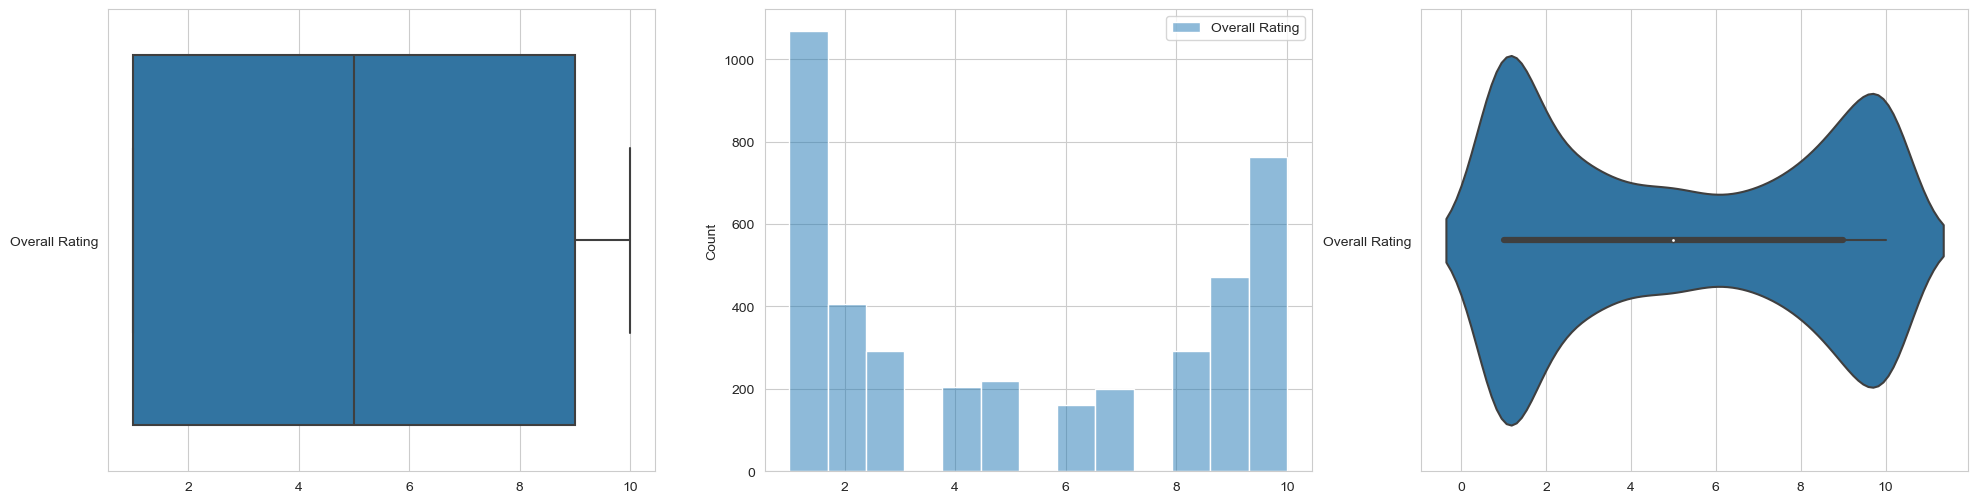

In [44]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

This is the Visualization for the *Overall Ratings* in Train Set.

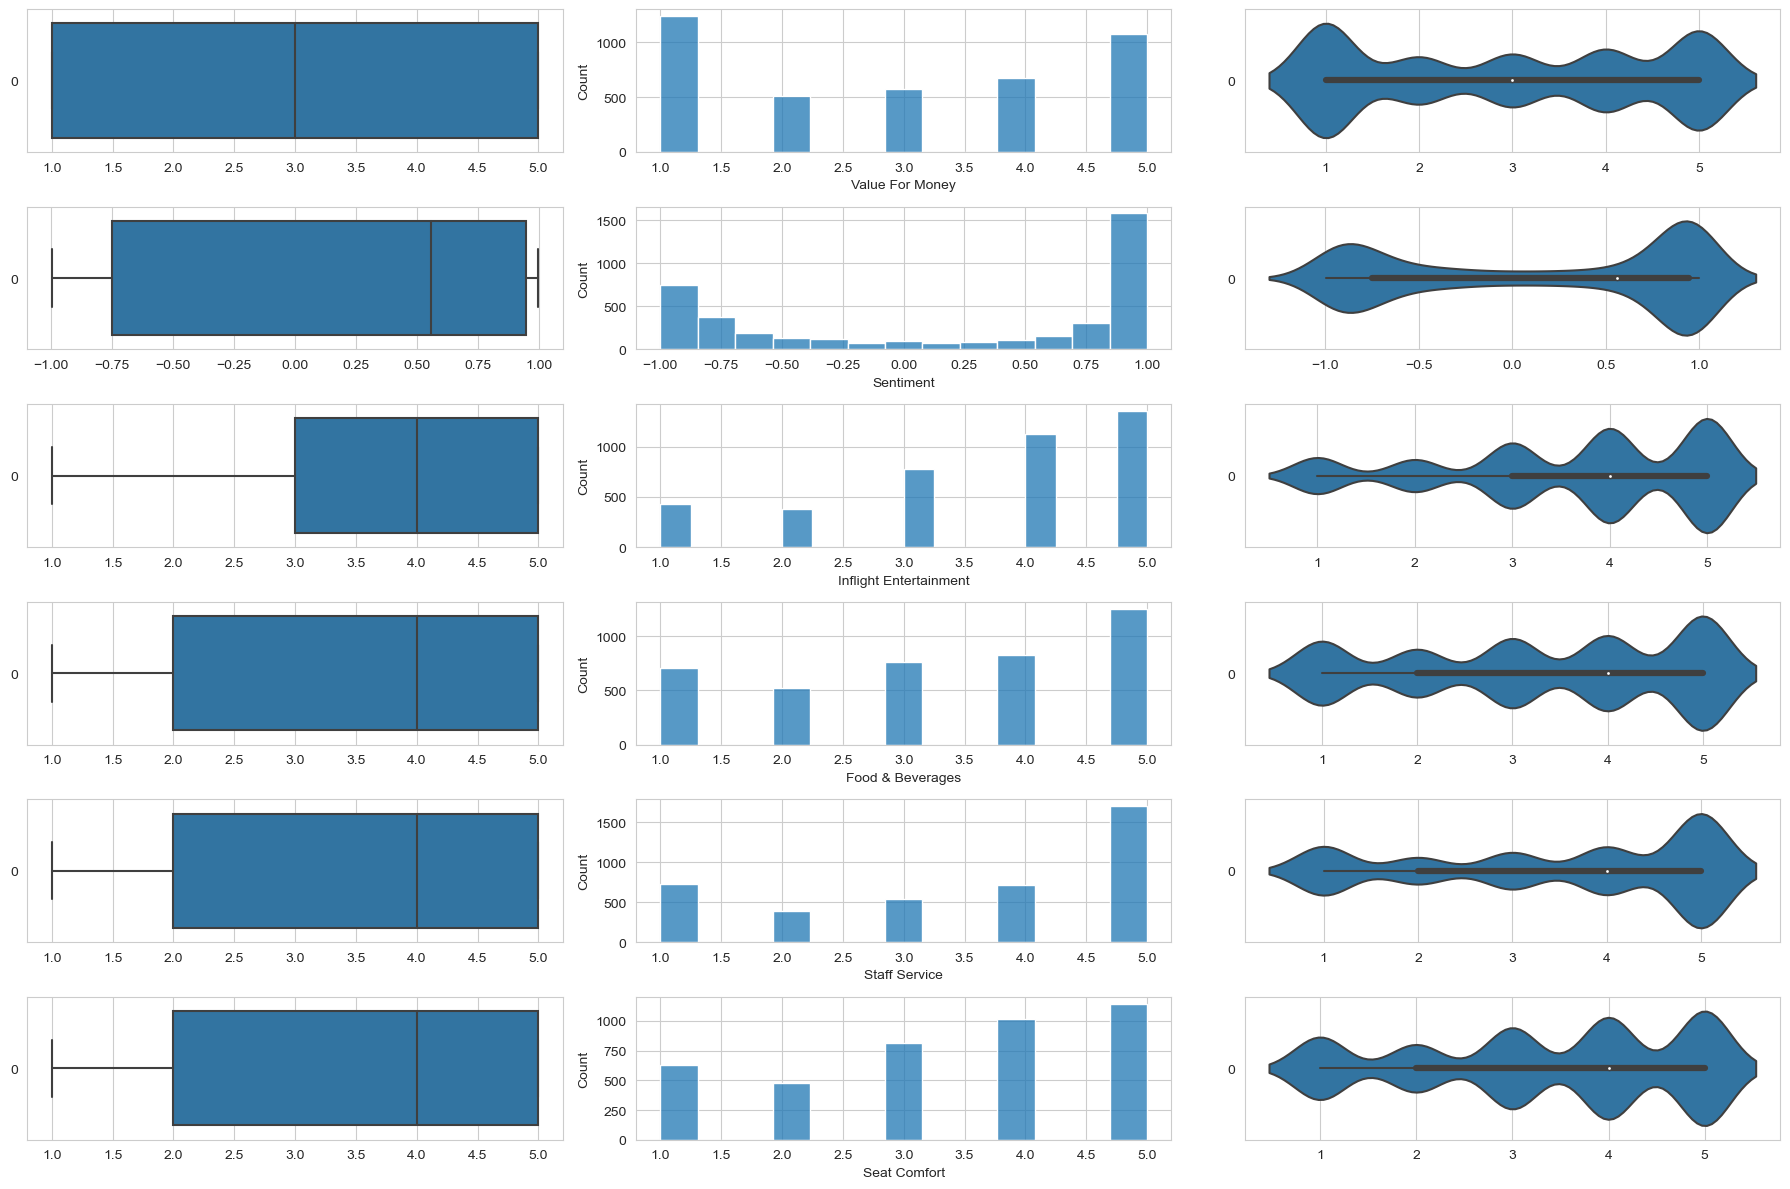

In [23]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(6, 3, figsize=(18, 12))

count = 0
for var in X_train.columns:  # Access column names instead of column values
    sb.boxplot(data=X_train[var], orient="h", ax=axes[count, 0])
    sb.histplot(data=X_train[var], ax=axes[count, 1])
    sb.violinplot(data=X_train[var], orient="h", ax=axes[count, 2])
    count += 1

# Show the plots
plt.tight_layout()
plt.show()

This is the visualization for the *Predictors* in Train Set.

In [45]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
coefficients = pd.DataFrame({"Predictors": X_train.columns, "Coefficients": linreg.coef_[0]})
print(coefficients)


Intercept of Regression 	: b =  [-0.30220283]
Coefficients of Regression 	: a =  [[1.60948961 1.01408545 0.01826715 0.03706433 0.04518178 0.06436708]]

               Predictors  Coefficients
0         Value For Money      1.609490
1               Sentiment      1.014085
2  Inflight Entertainment      0.018267
3        Food & Beverages      0.037064
4           Staff Service      0.045182
5            Seat Comfort      0.064367


*Linear Regression Model Training*:
- We import the LinearRegression model from scikit-learn.
- We use the fit method to train the linear regression model on the training data (X_train, y_train).

*Interpretation of Coefficients*:
- The intercept (b) and coefficients (a) of the linear regression model are printed. The intercept represents the value of the response variable when all predictor variables are zero. Coefficients represent the change in the response variable for a one-unit change in the predictor variable, holding other variables constant.
- The coefficients against predictors are printed in a DataFrame to show how each predictor variable contributes to predicting the overall rating.


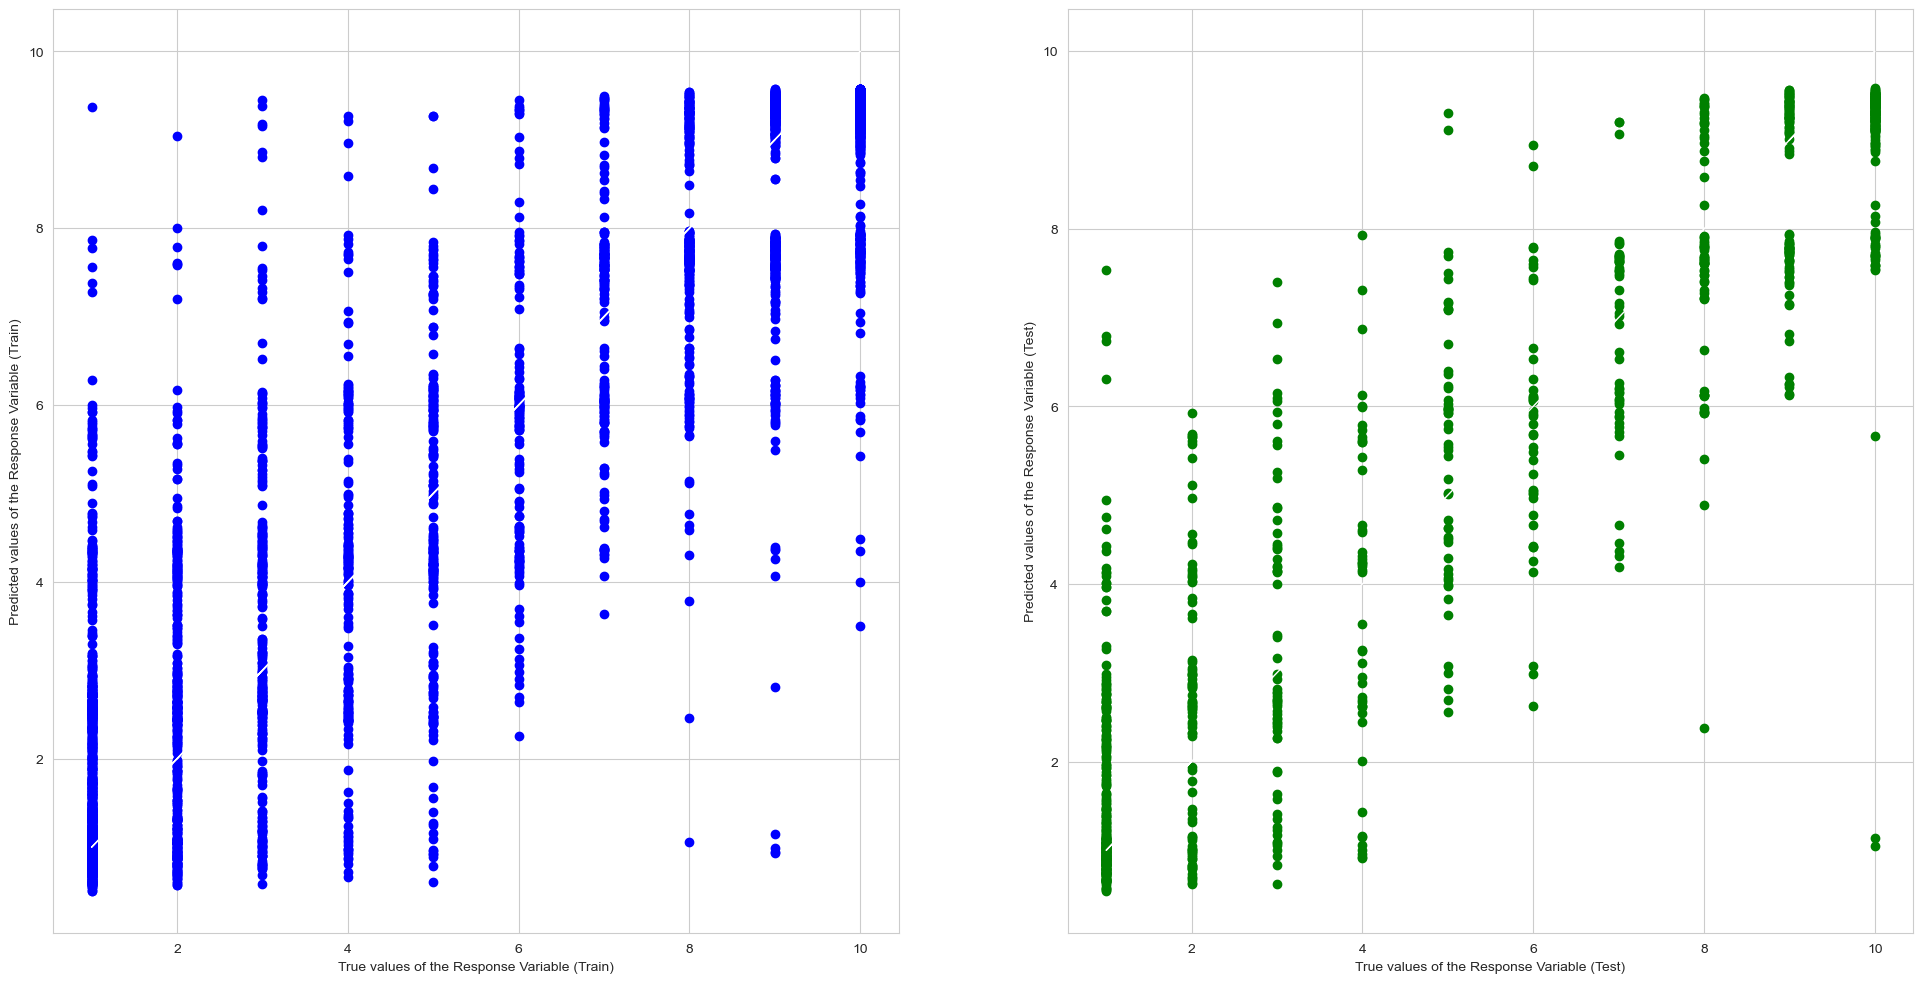

In [27]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

This is the Correlation Graph between the *Predicted Values* and *True Values* of Overall Ratings (Response Variable) for both Train and Test Set.

### Goodness of Fit of the model:


In [28]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8169923767542271
Mean Squared Error (MSE) 	: 2.340960511965166

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8456321073121518
Mean Squared Error (MSE) 	: 1.9988637911773224



We evaluated the performance of the Linear Regression Model using the Parameters *Explained Variance* and *Mean Squared Error*.

In [46]:
# Extract Airlines for Prediction
df_pred = cleaned_df[cleaned_df["Airline"].isin(['Singapore Airlines','Qatar Airways','Emirates','All Nippon Airways','Japan Airlines','EVA Air','Korean Airlines','Cathay Pacific Airways','Air France','Turkish Airlines'])]


In [47]:
# Extract Predictors for Prediction
predictors = ["Value For Money", "Sentiment","Inflight Entertainment","Food & Beverages","Staff Service","Seat Comfort"]
X_pred = pd.DataFrame(df_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[7.78451733],
       [1.07767709],
       [8.88908954],
       ...,
       [1.35306004],
       [9.22310341],
       [9.44448483]])

In [50]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal_LR"], index = df_pred.index)
cleaned_df_acc = pd.concat([df_pred[["Airline", "Overall Rating"]], y_pred], axis = 1)

y_errs = 100 * abs(cleaned_df_acc["Overall Rating"] - cleaned_df_acc["PredTotal_LR"]) / cleaned_df_acc["Overall Rating"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = df_pred.index)
cleaned_df_acc = pd.concat([cleaned_df_acc, y_errs], axis = 1)
cleaned_df_acc.to_csv('predicted_ratingsLR.csv', index=False)
cleaned_df_acc

,Airline,Overall Rating,PredTotal_LR,Error
0,Singapore Airlines,9,7.784517,13.505363
1,Singapore Airlines,3,1.077677,64.077430
2,Singapore Airlines,10,8.889090,11.109105
3,Singapore Airlines,10,9.545299,4.547015
4,Singapore Airlines,10,9.535360,4.646395
...,...,...,...,...
7900,EVA Air,10,7.937925,20.620751
7901,EVA Air,6,6.375588,6.259806
7908,EVA Air,2,1.353060,32.346998
7909,EVA Air,9,9.223103,2.478927


- The **PredTotal_LR** column shows the *predicted overall ratings* for each review.
- The **Error** column shows the *error percentage* in prediction.

---

## Model 3: Gradient Boosting Regression Model
---
We Initialize and Utilize a Gradient Boosting Regression (GBR) model to predict the overall rating of airlines based on the given predictor variables. 

### How Gradient Boosting Regression Works:
Gradient Boosting Regression is a machine learning technique used for regression tasks, where the goal is to predict continuous numerical values. Here's an overview of how GBR works:

- *Ensemble Learning*: GBR is an ensemble learning method, meaning it combines the predictions of multiple individual models (weak learners) to produce a more accurate prediction. In the case of GBR, the individual models are decision trees.

- *Boosting*: GBR is a type of boosting algorithm, where each new model in the ensemble focuses on the errors made by the previous models. It builds models sequentially, with each new model attempting to correct the mistakes of the previous ones.

- *Gradient Descent*: GBR minimizes the loss function (e.g., mean squared error) by iteratively fitting new models to the residuals (the differences between the actual and predicted values) of the previous models. It uses gradient descent optimization to find the direction of steepest decrease in the loss function.

- *Feature Importance*: GBR provides feature importances based on how often a feature is used in the construction of decision trees across all boosting iterations. Features that are more frequently used to make decisions tend to have higher importances.

In [32]:
# Initialize the Gradient Boosting Regression model
gbr = GradientBoostingRegressor(random_state=42) # The random_state parameter is set to 42 for reproducibility.

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

C:\Users\Deepak Mittal\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Get feature importances
feature_importances = gbr.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(importance_df)

                  Feature  Importance
0         Value For Money    0.913331
1               Sentiment    0.079736
5            Seat Comfort    0.002698
4           Staff Service    0.001736
3        Food & Beverages    0.001391
2  Inflight Entertainment    0.001108


*Feature Importance*:
The feature_importances_ attribute of the trained GBR model provides information about the importance of each predictor variable in making predictions. These importance scores represent how much each feature contributes to the model's predictive performance.

### Goodness Of Fit of the model

In [34]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Explained Variance:", explained_variance)

Mean Squared Error: 1.8848715167943246
Explained Variance: 0.8544752317179489


We evaluated the performance of the Gradient Boosting Regression Model using the Parameters Explained Variance and Mean Squared Error.

In [54]:
# Extract airlines for prediction
df_pred = cleaned_df[cleaned_df["Airline"].isin(['Singapore Airlines', 'Qatar Airways', 'Emirates', 'All Nippon Airways', 'Japan Airlines', 'EVA Air', 'Korean Airlines', 'Cathay Pacific Airways', 'Air France', 'Turkish Airlines'])]

# Extract predictors for prediction
predictors = ["Value For Money", "Sentiment", "Inflight Entertainment", "Food & Beverages", "Staff Service", "Seat Comfort"]
X_pred = pd.DataFrame(df_pred[predictors])

# Predict response corresponding to predictors using the trained GBR model
y_pred = gbr.predict(X_pred)

# Summarize the actuals, predictions, and errors
y_pred = pd.DataFrame(y_pred, columns=["PredTotal_GBR"], index=df_pred.index)
cleaned_df_acc = pd.concat([df_pred[["Airline", "Overall Rating"]], y_pred], axis=1)

y_errs = 100 * abs(cleaned_df_acc["Overall Rating"] - cleaned_df_acc["PredTotal_GBR"]) / cleaned_df_acc["Overall Rating"]
y_errs = pd.DataFrame(y_errs, columns=["Error"], index=df_pred.index)
cleaned_df_acc = pd.concat([cleaned_df_acc, y_errs], axis=1)
cleaned_df_acc.to_csv('predicted_ratingsGBR.csv', index=False)
cleaned_df_acc

,Airline,Overall Rating,PredTotal_GBR,Error
0,Singapore Airlines,9,8.444587,6.171255
1,Singapore Airlines,3,1.650905,44.969846
2,Singapore Airlines,10,8.624051,13.759493
3,Singapore Airlines,10,9.610349,3.896508
4,Singapore Airlines,10,9.698781,3.012192
...,...,...,...,...
7900,EVA Air,10,8.701879,12.981210
7901,EVA Air,6,5.965808,0.569866
7908,EVA Air,2,1.901350,4.932518
7909,EVA Air,9,9.275647,3.062740


- The **PredTotal_GBR** column shows the predicted overall ratings for each review.
- The **Error** column shows the error percentage in prediction.

## Comparing Both the Models

- We see that the **Mean Squared Error** of Linear Regression Model(1.9988637911773224) is **more than** the Mean Squared Error of Gradient Boosting Regression Model(1.8848715167943246).

- The **Explained Variance** of Linear Regression Model (0.8456321073121518) is **less than** the Explained Variance of Gradient Boosting Regression Model(0.8544752317179489).

Based on these values, Gradient Boosting Regression Model showed better performance. Therefore we used the Feature Importances from Gradient Boosting Regression Model for our Evaluation Framework.

##  SHAP Analysis of GBR Model 
---
SHAP (SHapley Additive exPlanations) is a method for interpreting the predictions of machine learning models. It provides explanations for individual predictions by quantifying the contribution of each feature to the model's output.

We used SHAP Analysis Method to interpret the Feature Importances given by Gradient Boosting Regression Model.

### How SHAP Works:

1. *Local Explanation*:
   - SHAP provides explanations on a per-instance basis, meaning it explains why a specific prediction was made for a particular data point.

2. *Feature Importance*:
   - SHAP assigns an importance value to each feature for a given prediction. This importance value represents the feature's contribution to the difference between the actual prediction and the baseline prediction (usually the mean prediction).

3. *Additivity Property*:
   - SHAP explanations have the desirable property of being additive, meaning the sum of the SHAP values for all features plus the model's expected value equals the model's prediction for a specific instance.

4. *Model Agnostic*:
   - SHAP is model agnostic, meaning it can be applied to any machine learning model regardless of its underlying architecture (e.g., linear models, tree-based models, neural networks).

5. *Computationally Efficient*:
   - SHAP uses a game-theoretic approach based on Shapley values, which allows it to efficiently compute explanations even for complex models with many features.

### Interpreting SHAP Graphs:

1. *SHAP Summary Plot*:
   - The summary plot provides an overview of feature importances across all data points. Each point represents a feature's SHAP value for a particular instance, and the vertical spread of points represents the feature's importance. Features are sorted by the average magnitude of their SHAP values across all instances.
   - Interpretation: Features with the highest absolute SHAP values have the greatest impact on model predictions across the dataset.

2. *Partial Dependence Plots (PDP)*:
   - PDPs show the relationship between a feature and the model output while marginalizing over the values of all other features.
   - Interpretation: The shape of the curve indicates how changes in the feature value affect the model prediction. A steeper slope implies a stronger influence on the prediction.

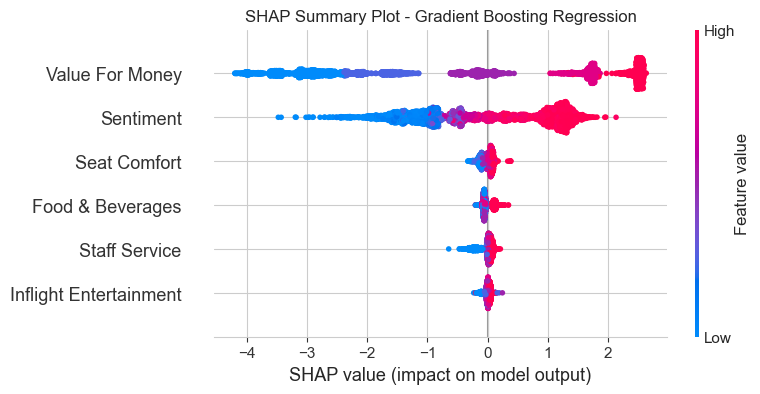

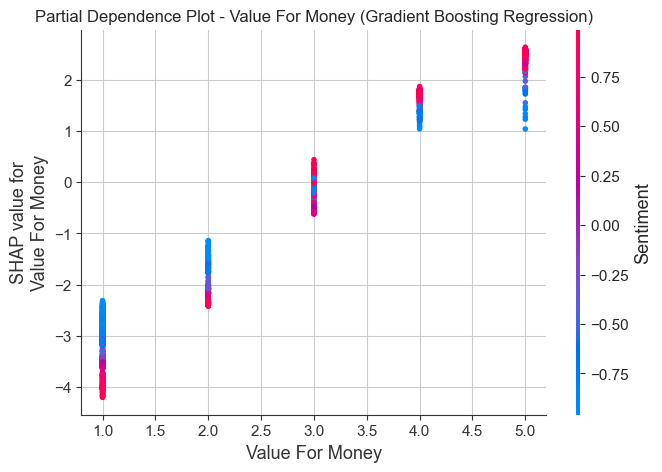

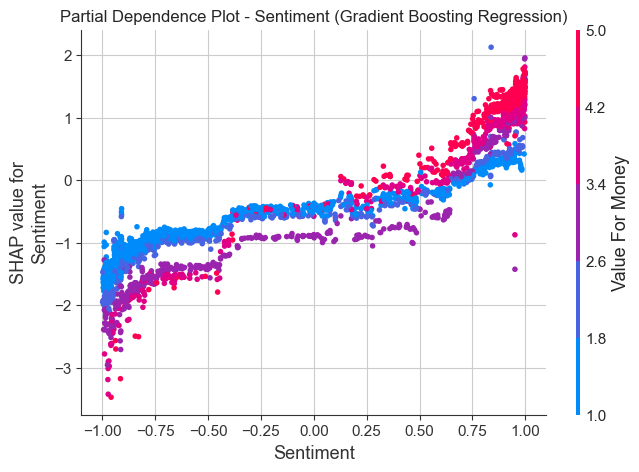

In [56]:
# Initialize SHAP explainer for Gradient Boosting Regression
gbr_explainer = shap.Explainer(gbr, X_train)

# Generate SHAP values for Gradient Boosting Regression
gbr_shap_values = gbr_explainer.shap_values(X_train)

# Summary plot for Gradient Boosting Regression
shap.summary_plot(gbr_shap_values, X_train, show=False)
plt.title("SHAP Summary Plot - Gradient Boosting Regression")
plt.show()

# Partial dependence plots for selected features for Gradient Boosting Regression
for feature_name in ['Value For Money', 'Sentiment']:
    shap.dependence_plot(feature_name, gbr_shap_values, X_train, show=False)
    plt.title(f"Partial Dependence Plot - {feature_name} (Gradient Boosting Regression)")
    plt.show()

## Using the framework to find the best airlines on our dataset.

In [60]:
# Calculate the mean predicted overall rating for each airline
mean_predicted_ratings = cleaned_df_acc.groupby('Airline')['PredTotal_GBR'].mean()

# Calculate the mean error for each airline
mean_errors = cleaned_df_acc.groupby('Airline')['Error'].mean()

# Combine mean predicted ratings and mean errors into a single DataFrame
summary_df = pd.DataFrame({'Mean Predicted Rating': mean_predicted_ratings, 'Mean Error': mean_errors})

# Sort the airlines based on mean predicted ratings
summary_df = summary_df.sort_values(by='Mean Predicted Rating', ascending=False)
summary_df.to_csv('airline_predicted_ratings.csv', index=False)
# Display the sorted DataFrame
print(summary_df)

                        Mean Predicted Rating  Mean Error
Airline                                                  
All Nippon Airways                   7.583287   19.876314
Japan Airlines                       6.800361   24.429427
Qatar Airways                        6.795662   32.011348
EVA Air                              6.776770   25.472197
Singapore Airlines                   6.098143   29.831176
Cathay Pacific Airways               5.255674   33.675313
Air France                           4.264925   38.701265
Emirates                             4.230962   41.150240
Turkish Airlines                     3.486278   48.214401


Based on the mean predicted ratings provided:

1. **All Nippon Airways** has the highest mean predicted rating of 7.58.
2. **Japan Airlines** follows with a mean predicted rating of 6.80.
3. **Qatar Airways** and **EVA Air** have similar mean predicted ratings around 6.80.

#### These rankings suggest that **All Nippon Airways** is perceived to be the best airline based on the predicted overall ratings.